 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



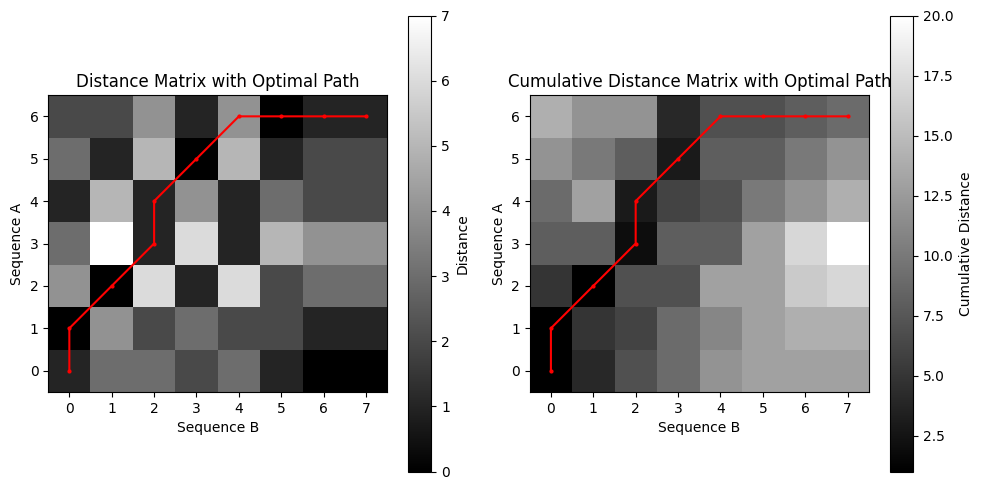

In [84]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def DTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################





    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix = np.zeros((len(sequence1), len(sequence2)))   #Cummulative distance matrix
    #Iterate through the sequence of points in sequences and compute the distance between the sequences.
    for i in range(len(sequence1)): #you can start from 1
        for j in range(len(sequence2)):
            current_distance = np.linalg.norm(sequence1[i] - sequence2[j])     #Compute the distance between the two points


            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"
            if i == 0 and j == 0:
                DTW_cumulate_Matrix[i, j] = current_distance
            elif i == 0:
                DTW_cumulate_Matrix[i, j] = current_distance + DTW_cumulate_Matrix[i, j-1]
            elif j == 0:
                DTW_cumulate_Matrix[i, j] = current_distance + DTW_cumulate_Matrix[i-1, j]
            else:
                DTW_cumulate_Matrix[i, j] = current_distance + min(DTW_cumulate_Matrix[i-1, j], DTW_cumulate_Matrix[i, j-1], DTW_cumulate_Matrix[i-1, j-1])


    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    opt_distance = 0.0
    i = len(sequence1) - 1 # length of the sequence1
    j = len(sequence2) - 1 # length of the sequence2
    optimal_path = [(i, j)]

    while i!=0 and j!=0: #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            # Find the minimum neighbor
            if DTW_cumulate_Matrix[i-1, j] == min(DTW_cumulate_Matrix[i-1, j], DTW_cumulate_Matrix[i, j-1], DTW_cumulate_Matrix[i-1, j-1]):
                i -= 1
            elif DTW_cumulate_Matrix[i, j-1] == min(DTW_cumulate_Matrix[i-1, j], DTW_cumulate_Matrix[i, j-1], DTW_cumulate_Matrix[i-1, j-1]):
                j -= 1
            else:
                i -= 1
                j -= 1


        # Add the current indexes distance
        opt_distance = opt_distance + np.linalg.norm(sequence1[i] - sequence2[j])   #Compute the distance between the points sequence1[i] and sequence2[j]


        #Store the required indexes to obtain the optimal path
        optimal_path.append((i, j))


    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################
    optimal_path.append((0, 0))
    return opt_distance, optimal_path[::-1], DTW_cumulate_Matrix


def plotDTWpath(sequence1,sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################

    #Compute distance and cumulative distance between the given templates
    distance_matrix = np.zeros((len(sequence1), len(sequence2)))
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            distance_matrix[i, j] = np.linalg.norm(sequence1[i] - sequence2[j])


    #Obtain the optimal path using "DTW" function
    optimal_distance, optimal_path, DTW_distance = DTW(sequence1, sequence2)
    optimal_path = np.array(optimal_path)


    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(distance_matrix, origin='lower', cmap='gray')
    plt.plot(optimal_path[:, 1], optimal_path[:, 0], color='red', marker='o', markersize=2)
    plt.title('Distance Matrix with Optimal Path')
    plt.xlabel('Sequence B')
    plt.ylabel('Sequence A')
    plt.colorbar(label='Distance')

    plt.subplot(1, 2, 2)
    plt.imshow(DTW_distance, origin='lower', cmap='gray')
    plt.plot(optimal_path[:, 1], optimal_path[:, 0], color='red', marker='o', markersize=2)
    plt.title('Cumulative Distance Matrix with Optimal Path')
    plt.xlabel('Sequence B')
    plt.ylabel('Sequence A')
    plt.colorbar(label='Cumulative Distance')

    plt.tight_layout()
    plt.show()


# Test the implementation
sequence1 = [4, 3, 7, 0, 2, 6, 5]
sequence2 = [3, 7, 1, 6, 1, 5, 4, 4]
plotDTWpath(sequence1, sequence2)

<b> Report your observations </b>

1. Optimal DTW Distance: The optimal DTW distance between the two sequences is computed using the implemented algorithm. This distance represents the similarity between the sequences after aligning them optimally.

2. Distance Matrix with Optimal Path: In the plot of the distance matrix with the optimal path, we can observe the Euclidean distance between each point of sequence A and sequence B. The red line indicates the optimal path found by the DTW algorithm.

3. Cumulative Distance Matrix with Optimal Path: The cumulative distance matrix shows the accumulated distance at each point of the matrix. The red line again represents the optimal path found by the DTW algorithm. This matrix helps in visualizing how the DTW algorithm computes the optimal alignment by accumulating distances along the path.




<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


**Module to record the voice in online mode**

In [85]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [88]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os
from IPython.display import Audio

#### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
!rm recording.wav

#### You can run this module in the loop to record more repetitions of the digits.
if os.path.isfile('recording.wav'):
    print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
else:
    print("Recording the digits")
    wav = record(3.0) #It will record three seconds of your speech. You can change the duration.
    wav = wav.set_frame_rate(16000)
    sig=wav.get_array_of_samples()
    samples=np.array(sig).T.astype(np.float32)
    fp_arr = np.array(samples).T.astype(np.float32)
    fp_arr /= np.iinfo(sig.typecode).max
    scipy.io.wavfile.write('recording.wav', 16000, fp_arr) #Please change the name.

wn = Audio('recording.wav', autoplay=True)
display(wn)

Recording the digits


<IPython.core.display.Javascript object>

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import numpy as np
import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy

# Define dictionaries to store audio paths for training and testing
digit_arrays_train = {}
digit_arrays_test1 = {}
digit_arrays_test2 = {}
digit_arrays_test3 = {}

# Iterate over each number from zero to nine
for number in ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]:
    # Iterate over suffixes 1, 2, 3 and 4
    for suffix in range(1, 5):
        # Convert suffix to string
        suffix_str = str(suffix)
        # Construct variable name and audio file path
        variable_name = f"{number}Audio_{suffix_str}"
        audio_value = f"{number}_{suffix_str}.wav"

        # Assign audio file path to the appropriate dictionary based on suffix
        if suffix == 1:
            digit_arrays_train[number] = audio_value
        elif suffix == 2:
            digit_arrays_test1[number] = audio_value
        elif suffix == 3:
            digit_arrays_test2[number] = audio_value
        elif suffix == 4:
            digit_arrays_test3[number] = audio_value

In [159]:
import numpy as np
import speechpy
from scipy.io import wavfile

# Define a function to compute MFCC features from audio
def compute_mfcc(audio_path, nfft=1103):
    # Read audio file
    rate, sig = wavfile.read(audio_path)

    # Preprocessing: remove mean
    sig = sig - np.mean(sig)

    # Extract MFCC features
    mfcc_feat = speechpy.feature.mfcc(sig, sampling_frequency=rate, num_cepstral=13, frame_length=0.025, frame_stride=0.01, num_filters=40, fft_length=nfft)

    # Apply cepstral mean and variance normalization
    mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)

    return mfcc_feat_cmvn

# Dictionary to store computed MFCC features
audio_train = {}
audio_test1 = {}
audio_test2 = {}
audio_test3 = {}

# Process training data
for digit_name, audio_path in digit_arrays_train.items():
    audio_train[digit_name] = compute_mfcc(audio_path)

# Process test data 1
for digit_name, audio_path in digit_arrays_test1.items():
    audio_test1[digit_name] = compute_mfcc(audio_path)

# Process test data 2
for digit_name, audio_path in digit_arrays_test2.items():
    audio_test2[digit_name] = compute_mfcc(audio_path)

# Process test data 3
for digit_name, audio_path in digit_arrays_test3.items():
    audio_test3[digit_name] = compute_mfcc(audio_path)

**Algorithm to perform isolated digit recognition**

In [115]:
# Define a function for isolated digit recognition
def isolated_digit_recognition(audio_train, test_audio):
    # Compare test template with templates of all digits
    distances = []

    # Iterate through each digit template in the training set
    for digit_name, digit_audio in audio_train.items():
        # Compute Dynamic Time Warping (DTW) distance between test audio and digit template
        distance, _, _ = DTW(test_audio, digit_audio)
        distances.append((digit_name, distance))

    # Identify the digit with the minimum DTW distance
    recognized_digit, min_distance = min(distances, key=lambda x: x[1])
    return recognized_digit, min_distance

# Test the isolated digit recognition function
recognized_digit, min_distance = isolated_digit_recognition(audio_train, audio_test1["seven"])
print(f"The recognized digit is: {recognized_digit}, with a minimum distance of: {min_distance}")

The recognized digit is: seven, with a minimum distance of: 902.4108262062073


**Plot the optimal DTW path**

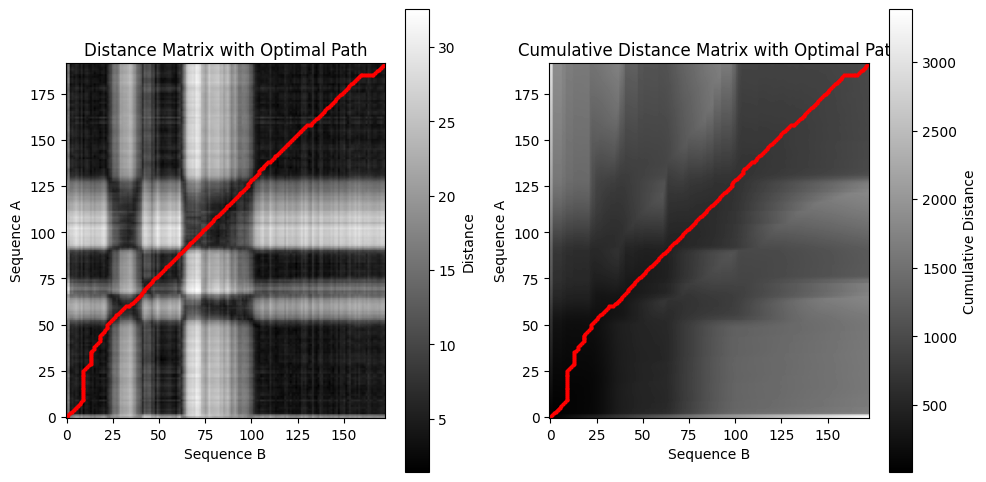

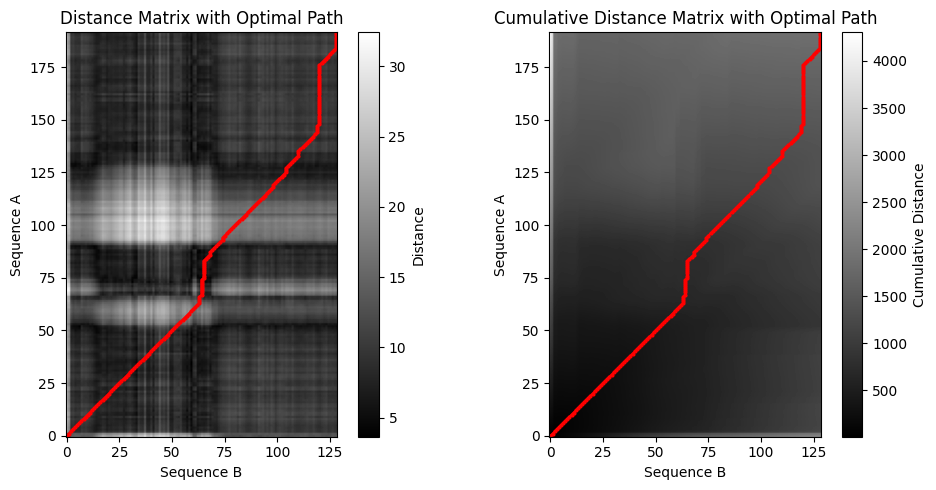

In [92]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

plotDTWpath(audio_test1["six"], audio_test2["six"])
plotDTWpath(audio_test1["six"], audio_train["four"])

**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [93]:
import numpy as np
import matplotlib.pyplot as plt

correct_count = 0
confusion_matrix = np.zeros((10, 10))

# Define a dictionary mapping digit names to numerical values
numbers_mapping = {'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9}

for digit_name, digit_audio_path in digit_arrays_test1.items():
    recognized_digit, min_distance = isolated_digit_recognition(audio_train, audio_test1[digit_name])
    confusion_matrix[numbers_mapping[digit_name] - 1, numbers_mapping[recognized_digit] - 1] += 1
    if recognized_digit == digit_name:
        correct_count += 1

for digit_name, digit_audio_path in digit_arrays_test2.items():
    recognized_digit, min_distance = isolated_digit_recognition(audio_train, audio_test2[digit_name])
    confusion_matrix[numbers_mapping[digit_name] - 1, numbers_mapping[recognized_digit] - 1] += 1
    if recognized_digit == digit_name:
        correct_count += 1

for digit_name, digit_audio_path in digit_arrays_test3.items():
    recognized_digit, min_distance = isolated_digit_recognition(audio_train, audio_test3[digit_name])
    confusion_matrix[numbers_mapping[digit_name] - 1, numbers_mapping[recognized_digit] - 1] += 1
    if recognized_digit == digit_name:
        correct_count += 1

# Calculate accuracy
accuracy = correct_count / 30

# Print accuracy and confusion matrix
print(f"Accuracy of recognition: {accuracy:.2f}")
print("The confusion matrix is:")
print(confusion_matrix)

Accuracy of recognition: 0.77
The confusion matrix is:
[[1. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 2.]]


<b> Report your observations </b>

1. The confusion matrix formed is dense at the diagonal.

2. The confusion matrix provides insights into the performance of the system. By analyzing the confusion matrix, we can identify the digits that are frequently confused with each other. This information can guide improvements in the recognition algorithm or additional training data for specific digits.

3. We can assess the robustness of the system to variations in speech, such as different accents, speech rates, and background noise.


<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

# Function for performance evaluation of isolated digit recognition system on TDIGITS data
def isolated_digit_recognition_person(person, test_audio):
    # Compare test template with templates of all digits
    distances = []

    # Iterate through each digit template in the training set
    for i in range(0, 10):
        # Compute Dynamic Time Warping (DTW) distance between test audio and digit template
        distance, _, _ = DTW(test_audio, compute_mfcc(f"{i}_{person}_0.wav"))
        distances.append(distance)

    # Identify the digit with the minimum DTW distance
    recognized_digit = np.argmin(distances)
    min_distance = distances[recognized_digit]
    return recognized_digit, min_distance

# Performance evaluation of isolated digit recognition system on TDIGITS data, with the reference and test signal coming from the same speaker
persons = ["jackson", "nicolas", "theo", "yweweler"]

for person in persons:
    total_correct = 0

    for number in range(0, 10):
        for i in range(1, 50):
            audio_file = f"{number}_{person}_{i}.wav"

            audio_test = compute_mfcc(audio_file)
            recognized_digit, min_distance = isolated_digit_recognition_person(person, audio_test)

            if recognized_digit == number:
                total_correct += 1

    total_trials = 10 * 49  # Total number of trials for each person
    accuracy = total_correct / total_trials
    print(f"Accuracy of recognition for {person} is: {accuracy:.2f}")

# Performance evaluation of isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers
different_persons = ["nicolas", "theo", "yweweler"]

# Initialize total_correct to keep track of correct recognitions across all speakers
total_correct = 0

for person in persons:
    for number in range(0, 10):
        for i in range(0, 50):
            audio_file = f"{number}_{person}_{i}.wav"

            audio_test = compute_mfcc(audio_file)
            recognized_digit, min_distance = isolated_digit_recognition_person("jackson", audio_test)

            if recognized_digit == number:
                total_correct += 1          # Add the correct recognitions for the current speaker to the total count

# Calculate the total number of trials across all speakers
total_trials = 10 * 50 * 3

# Calculate the accuracy
accuracy = total_correct / total_trials
print(f"Accuracy of recognition for reference and test signal coming from different speakers is: {accuracy:.2f}")

#Suggest some of the changes to improve the system performance.

# 1. Data Augmentation: Increase the diversity of training data by applying techniques like pitch shifting, time stretching, and adding noise.
# 2. Feature Engineering: Experiment with different feature representations such as delta coefficients, pitch, energy, etc., alongside MFCCs to capture more discriminative information.
# 3. Model Tuning: Explore different classification models like SVM, neural networks, or ensemble methods to find the one that best fits the problem.
# 4. Parameter Optimization: Fine-tune parameters such as the number of MFCC coefficients, frame length, frame stride, etc., to optimize the performance of the DTW algorithm.
# 5. Speaker Adaptation: Implement speaker adaptation techniques like Gaussian Mixture Model-Universal Background Model (GMM-UBM) or i-vectors to handle speaker variability more effectively.
# 6. Ensemble Methods: Combine multiple recognition systems with different characteristics to improve robustness and accuracy.
# 7. Error Analysis: Analyze the confusion matrix to identify common misclassifications and focus on improving recognition performance for those specific cases.


<b> Report your observations </b>

1.

2.

3.

